# 이미지 수집 및 DataLoader로 변환

In [11]:
!git clone https://github.com/ndb796/bing_image_downloader

fatal: destination path 'bing_image_downloader' already exists and is not an empty directory.


In [ ]:
import os
import shutil
from bing_image_downloader.bing_image_downloader import downloader

import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, models, transforms

from tensorboardX import SummaryWriter
import tqdm

from PIL import Image

tensor([[-3.2893, -2.6210,  2.9466]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

In [ ]:
# 생성 -> 이동 -> 삭제(수업 version)

# directory_list = [
#         './dataset/train/',
#         './dataset/test/',
#     ]

# downloader.download(query='카피바라', limit=50, output_dir='./',adult_filter_off=True,force_replace=False,timeout=60)

# def dataset_split(query, train_cnt):   
#     for dir in directory_list:  
#         if not os.path.isdir(dir+query):
#             os.makedirs(dir+query)

#     cnt = 0

#     for file_name in os.listdir(query):
#         if cnt < train_cnt:
#             shutil.move(query+"/"+file_name, './dataset/train/'+query+'/'+file_name )
#         else:
#             shutil.move(query+"/"+file_name, './dataset/test/'+query+'/'+file_name )
        
#         cnt += 1

#     shutil.rmtree(query)

# dataset_split('카피바라',40)

[Info] Indexing page: 1
[Info] Indexed 35 Images on Page 1.
#1 이미지 다운로드 (https://cdn.pixabay.com/photo/2022/07/01/13/07/capybara-7295601_1280.jpg)
#1 파일 다운로드가 완료되었습니다.
#2 이미지 다운로드 (https://cdn.pixabay.com/photo/2022/10/25/05/56/capybaras-7544912_1280.jpg)
#2 파일 다운로드가 완료되었습니다.
#3 이미지 다운로드 (https://png.pngtree.com/background/20230424/original/pngtree-brown-capybara-wating-for-water-in-the-jungle-picture-image_2456049.jpg)
#3 파일 다운로드가 완료되었습니다.
#4 이미지 다운로드 (https://cdn.pixabay.com/photo/2022/04/25/06/39/capybaras-7155224_1280.jpg)
#4 파일 다운로드가 완료되었습니다.
#5 이미지 다운로드 (https://cdn.pixabay.com/photo/2016/10/11/16/13/capybara-1732019_960_720.jpg)
#5 파일 다운로드가 완료되었습니다.
#6 이미지 다운로드 (https://img1.yna.co.kr/photo/yna/YH/2022/12/28/PYH2022122814730006100_P4.jpg)
[Info] Issue getting: https://img1.yna.co.kr/photo/yna/YH/2022/12/28/PYH2022122814730006100_P4.jpg
[Error] <urlopen error [SSL: UNSAFE_LEGACY_RENEGOTIATION_DISABLED] unsafe legacy renegotiation disabled (_ssl.c:1016)>
#6 이미지 다운로드 (https://png.p

In [ ]:
# 생성과 분리 한번에 하는 함수

def dataset_download_split(query_input, total_count, train_rate):   
        
    # jpg, jpeg, png만 가능하도록 처리해야 함(webp 주의)    
    downloader.download(query=query_input, limit=total_count, output_dir='./', 
                        adult_filter_off=True, force_replace=False, timeout=60)
    
    directory_dict = {
        'train' : './dataset/train/',
        'test' : './dataset/test/',
    }
    
    for dir in directory_list:  
        if not os.path.isdir(dir + query_input):
            os.makedirs(dir + query_input)

    train_cnt = int(total_count * train_rate)
    cnt = 0

    for file_name in os.listdir(query_input):
        if cnt < train_cnt:
            shutil.move(query_input + "/" + file_name, directory_dict['train'] + query_input+'/' + file_name )
        else:
            shutil.move(query_input + "/" + file_name, directory_dict['test'] + query_input + '/' + file_name )
        
        cnt += 1

    shutil.rmtree(query_input)

In [40]:
dataset_download_split(query_input = '마동석', total_count = 50, train_rate = 0.8)
dataset_download_split(query_input = '카리나', total_count = 50, train_rate = 0.8)
dataset_download_split(query_input = '이수지', total_count = 50, train_rate = 0.8)

[Info] Indexing page: 1
[Info] Indexed 35 Images on Page 1.
#1 이미지 다운로드 (http://talkimg.imbc.com/TVianUpload/tvian/TViews/image/2019/05/14/5tjArQ2TYQ7Y636934517816837543.jpg)
#1 파일 다운로드가 완료되었습니다.
#2 이미지 다운로드 (https://entertainimg.kbsmedia.co.kr/cms/uploads/PERSON_20240206075441_1b54f931528a9d36c98db236a5e19d74.jpg)
#2 파일 다운로드가 완료되었습니다.
#3 이미지 다운로드 (https://img.tvreportcdn.de/cms-content/uploads/2023/05/22/5d7cd409-b0ed-438a-a65a-95fc262864d6.jpg)
#3 파일 다운로드가 완료되었습니다.
#4 이미지 다운로드 (https://newsimg.sedaily.com/2023/05/22/29POFIOI4D_1.jpg)
#4 파일 다운로드가 완료되었습니다.
#5 이미지 다운로드 (https://talkimg.imbc.com/TVianUpload/tvian/TViews/image/2023/05/29/634edfdc-1b35-4ce1-90e8-fd03fc9cf00d.jpg)
#5 파일 다운로드가 완료되었습니다.
#6 이미지 다운로드 (https://img.etnews.com/news/article/2023/06/05/news-p.v1.20230605.9f5212ecfaf34a79865d1145b6828b8a_P1.jpg)
#6 파일 다운로드가 완료되었습니다.
#7 이미지 다운로드 (https://img.hankyung.com/photo/201709/01.14677695.1.jpg)
#7 파일 다운로드가 완료되었습니다.
#8 이미지 다운로드 (https://image.xportsnews.com/contents/images/uplo

In [18]:
transforms_train = transforms.Compose(
    [
        transforms.Resize((224,224)),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) 
    ]
)

transforms_test = transforms.Compose(
    [
        transforms.Resize((224,224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]
)


# torch가 자동으로 mapping(label 값을 생성)
# datasets
#   -train
#   -test
train_datasets = datasets.ImageFolder(root='./dataset/train', transform=transforms_train)
test_datasets = datasets.ImageFolder(root='./dataset/test', transform=transforms_test)
train_datasets

Dataset ImageFolder
    Number of datapoints: 120
    Root location: ./dataset/train
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [21]:
train_dataloader = torch.utils.data.DataLoader(train_datasets, batch_size=4, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_datasets, batch_size=4, shuffle=False)

In [22]:
next(iter(train_dataloader))

[tensor([[[[ 1.5468,  1.5468,  1.5468,  ..., -1.1760, -1.1418, -1.1589],
           [ 1.5810,  1.5810,  1.5982,  ..., -1.1760, -1.1418, -1.1418],
           [ 1.6495,  1.6667,  1.6838,  ..., -1.1589, -1.1589, -1.1418],
           ...,
           [-1.5014, -1.5357, -1.5357,  ..., -1.5185, -1.5185, -1.5357],
           [-1.5528, -1.5699, -1.5528,  ..., -1.5185, -1.5357, -1.5185],
           [-1.5699, -1.5699, -1.5699,  ..., -1.5185, -1.5357, -1.5357]],
 
          [[ 0.6254,  0.6254,  0.6254,  ..., -1.1078, -1.0728, -1.0903],
           [ 0.6604,  0.6604,  0.6779,  ..., -1.1078, -1.0728, -1.0728],
           [ 0.7304,  0.7479,  0.7829,  ..., -1.0903, -1.0903, -1.0728],
           ...,
           [-1.4055, -1.4230, -1.4230,  ..., -1.4405, -1.4230, -1.4405],
           [-1.4230, -1.4230, -1.4230,  ..., -1.4405, -1.4580, -1.4405],
           [-1.4230, -1.4230, -1.4230,  ..., -1.4405, -1.4580, -1.4580]],
 
          [[ 0.1999,  0.1999,  0.1999,  ..., -0.5147, -0.4798, -0.4973],
           [ 

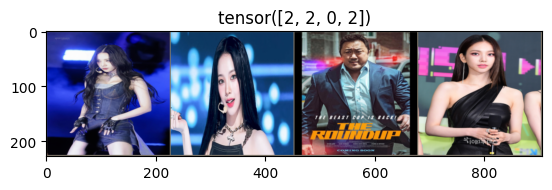

In [23]:
def imshow(img, title):
    
    img = img.numpy().transpose([1,2,0])
    
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    
    img = std * img + mean
    img = np.clip(img, 0, 1)
    
    plt.imshow(img)
    plt.title(title)
    plt.show()
    
images, labels = next(iter(train_dataloader))    
images_data = torchvision.utils.make_grid(images)

imshow(images_data, labels) # test할때 활용(배치 단위로 묶어서 화면 출력)

# 전이 모델로 예측

In [ ]:
model = models.resnet34(pretrained=True) # 사람 기반의 구분을 하려고 하기 때문에 기존 모델 전이 학습
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
#Layer freezing
for param in model.parameters(): 
    param.requires_grad = False # 모든 가중치 동결(frozen) : 업데이트 되지 않음 - 역전파 x

# Classifier custom
# (fc): Linear(in_features=512, out_features=1000, bias=True) => fc 이부분은 모델마다 다를 수 있으므로 확인
model.fc = nn.Linear(in_features=512, out_features=3) 
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [31]:
optimizer = optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()

device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device)

writer = SummaryWriter()

epochs = 50
step = 0

for epoch in range(epochs):
    for data, labels in tqdm.tqdm(train_dataloader):
        optimizer.zero_grad()
        preds = model(data.to(device))
        loss = criterion(preds, labels.to(device))
        writer.add_scalar('Loss/train', loss.item(), step)
        loss.backward()
        optimizer.step()
        step += 1
        
    print('loss', loss.item())    
    
# sci-kit learn이나 tensorboard로 학습 결과 측정 및 확인    

# tensorboard 조회
# tensorboard --logdir=.
# uv run tensorboard --logdir runs
# http://localhost:6006/?darkMode=true#timeseries

100%|██████████| 30/30 [00:07<00:00,  3.77it/s]


loss 1.0312763452529907


100%|██████████| 30/30 [00:06<00:00,  4.51it/s]


loss 1.6839505434036255


100%|██████████| 30/30 [00:06<00:00,  4.36it/s]


loss 0.7219998836517334


100%|██████████| 30/30 [00:06<00:00,  4.48it/s]


loss 1.425406813621521


100%|██████████| 30/30 [00:06<00:00,  4.38it/s]


loss 0.6201953887939453


100%|██████████| 30/30 [00:06<00:00,  4.48it/s]


loss 0.2085961401462555


100%|██████████| 30/30 [00:06<00:00,  4.46it/s]


loss 0.4237211346626282


100%|██████████| 30/30 [00:06<00:00,  4.76it/s]


loss 0.5819994211196899


100%|██████████| 30/30 [00:06<00:00,  4.30it/s]


loss 0.6261903047561646


100%|██████████| 30/30 [00:06<00:00,  4.72it/s]


loss 0.19807858765125275


100%|██████████| 30/30 [00:06<00:00,  4.70it/s]


loss 0.5389372110366821


100%|██████████| 30/30 [00:05<00:00,  5.31it/s]


loss 0.21860863268375397


100%|██████████| 30/30 [00:06<00:00,  4.32it/s]


loss 0.48396557569503784


100%|██████████| 30/30 [00:06<00:00,  4.41it/s]


loss 0.6087364554405212


100%|██████████| 30/30 [00:06<00:00,  4.76it/s]


loss 0.4064334034919739


100%|██████████| 30/30 [00:05<00:00,  5.10it/s]


loss 0.12376938760280609


100%|██████████| 30/30 [00:06<00:00,  4.29it/s]


loss 0.6657315492630005


100%|██████████| 30/30 [00:06<00:00,  4.33it/s]


loss 0.42307546734809875


100%|██████████| 30/30 [00:07<00:00,  4.21it/s]


loss 0.23396220803260803


100%|██████████| 30/30 [00:07<00:00,  4.20it/s]


loss 0.09750340133905411


100%|██████████| 30/30 [00:06<00:00,  4.37it/s]


loss 0.07638989388942719


100%|██████████| 30/30 [00:06<00:00,  4.45it/s]


loss 0.1048414334654808


100%|██████████| 30/30 [00:06<00:00,  4.50it/s]


loss 1.3346929550170898


100%|██████████| 30/30 [00:05<00:00,  5.12it/s]


loss 1.9755744934082031


100%|██████████| 30/30 [00:05<00:00,  5.53it/s]


loss 0.6114257574081421


100%|██████████| 30/30 [00:05<00:00,  5.53it/s]


loss 0.11809344589710236


100%|██████████| 30/30 [00:05<00:00,  5.46it/s]


loss 0.2623335123062134


100%|██████████| 30/30 [00:05<00:00,  5.01it/s]


loss 0.06511668115854263


100%|██████████| 30/30 [00:06<00:00,  4.81it/s]


loss 0.04084021598100662


100%|██████████| 30/30 [00:06<00:00,  4.93it/s]


loss 0.13282567262649536


100%|██████████| 30/30 [00:06<00:00,  4.77it/s]


loss 0.3249562382698059


100%|██████████| 30/30 [00:06<00:00,  4.67it/s]


loss 0.08980948477983475


100%|██████████| 30/30 [00:06<00:00,  4.32it/s]


loss 0.6537403464317322


100%|██████████| 30/30 [00:07<00:00,  4.19it/s]


loss 0.27062785625457764


100%|██████████| 30/30 [00:07<00:00,  4.26it/s]


loss 0.21753562986850739


100%|██████████| 30/30 [00:06<00:00,  4.98it/s]


loss 0.2003600150346756


100%|██████████| 30/30 [00:06<00:00,  4.42it/s]


loss 1.3719148635864258


100%|██████████| 30/30 [00:06<00:00,  4.87it/s]


loss 0.0366269126534462


100%|██████████| 30/30 [00:06<00:00,  4.42it/s]


loss 0.0836554765701294


100%|██████████| 30/30 [00:07<00:00,  4.26it/s]


loss 0.1439492106437683


100%|██████████| 30/30 [00:06<00:00,  4.70it/s]


loss 0.19211475551128387


100%|██████████| 30/30 [00:06<00:00,  4.53it/s]


loss 0.021190177649259567


100%|██████████| 30/30 [00:06<00:00,  4.37it/s]


loss 0.25774818658828735


100%|██████████| 30/30 [00:06<00:00,  4.33it/s]


loss 0.7724173069000244


100%|██████████| 30/30 [00:06<00:00,  4.59it/s]


loss 0.05027809739112854


100%|██████████| 30/30 [00:04<00:00,  6.47it/s]


loss 0.42300158739089966


100%|██████████| 30/30 [00:06<00:00,  4.43it/s]


loss 0.48371458053588867


100%|██████████| 30/30 [00:06<00:00,  4.49it/s]


loss 0.1011563092470169


100%|██████████| 30/30 [00:04<00:00,  6.40it/s]


loss 0.4042309522628784


100%|██████████| 30/30 [00:05<00:00,  5.77it/s]

loss 0.07099179178476334


예측결과 : tensor([0, 0, 0, 0], device='cuda:0'), 정답: tensor([0, 0, 0, 0])


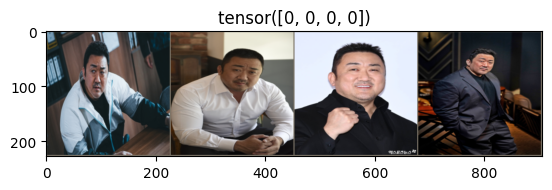

예측결과 : tensor([0, 0, 0, 0], device='cuda:0'), 정답: tensor([0, 0, 0, 0])


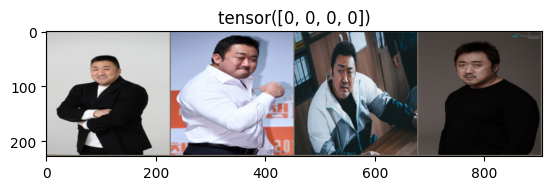

예측결과 : tensor([0, 0, 1, 1], device='cuda:0'), 정답: tensor([0, 0, 1, 1])


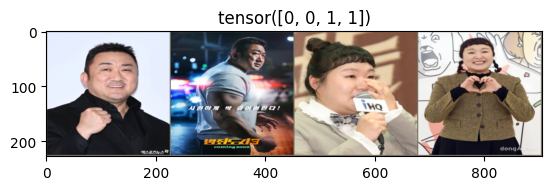

예측결과 : tensor([1, 0, 0, 1], device='cuda:0'), 정답: tensor([1, 1, 1, 1])


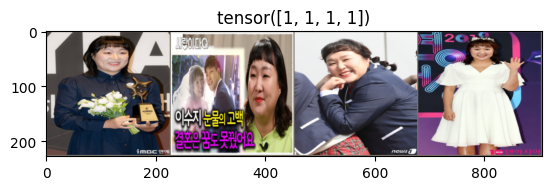

예측결과 : tensor([1, 1, 1, 1], device='cuda:0'), 정답: tensor([1, 1, 1, 1])


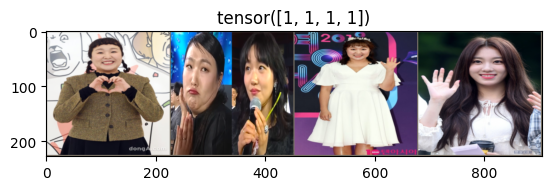

예측결과 : tensor([2, 2, 2, 2], device='cuda:0'), 정답: tensor([2, 2, 2, 2])


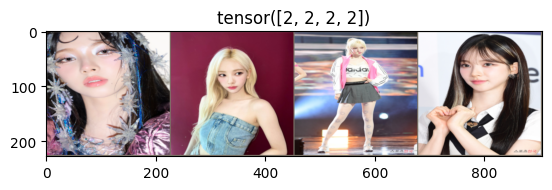

예측결과 : tensor([2, 2, 2, 1], device='cuda:0'), 정답: tensor([2, 2, 2, 2])


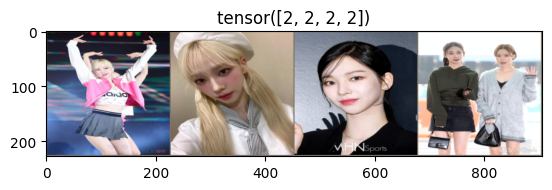

예측결과 : tensor([2, 2], device='cuda:0'), 정답: tensor([2, 2])


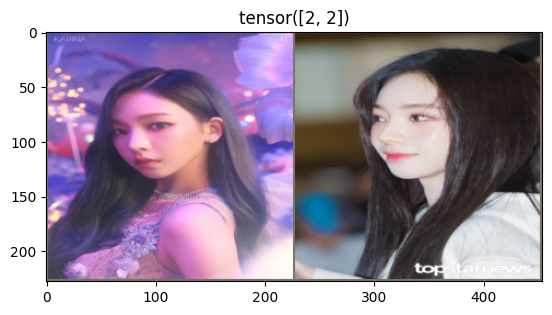

tensor(27, device='cuda:0')
최종 정확도 :  tensor(0.9000, device='cuda:0')


In [37]:
model.eval()

total_pred = 0

with torch.no_grad():
    for data, label in test_dataloader:
        pred = model(data.to(device)) 
        
        pred = torch.max(pred, 1)[1] # [0 , 1, 1, 2]
        
        total_pred = total_pred + torch.sum(pred==label.to(device).data)
        
        print(f'예측결과 : {pred}, 정답: {label}')
        images_data = torchvision.utils.make_grid(data)
        imshow(images_data.to('cpu'), label)

print(total_pred)        
print('최종 정확도 : ', total_pred/len(test_datasets))

In [ ]:
# 정확도가 낮게 나오는 경우
# 1. Data 확인 
# 2. freeze된 model을 해동 후 다시 가진 Data로 재학습

In [42]:
image = Image.open('data/ka.jpg')
image = transforms_test(image).unsqueeze(0).to(device)

result = model(image)
torch.max(result, 1)

torch.return_types.max(
values=tensor([2.9466], device='cuda:0', grad_fn=<MaxBackward0>),
indices=tensor([2], device='cuda:0'))

In [ ]:
# 가중치만 저장(실무에서 주로 사용하는 형태)
torch.save(model.state_dict(), 'model/celeb_model_weight.pth') # 딥러닝 저장법(머신러닝은 joblib)

In [ ]:
# 모델의 전체 저장(가중치 + 구조)
torch.save(model, 'model/celeb_model_total.pth')